In [436]:
import numpy as np
import scipy as sp
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
from main import NPHC
from scipy.linalg import inv, sqrtm, eigh, pinv
import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
from utils.loader import load_data
# Load Cumulants object
kernel = 'rect_d10'
mode = 'nonsym_2_hard'
log10T = 10
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_params_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Alpha, Beta, Gamma = load_data(url)

... loading data


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


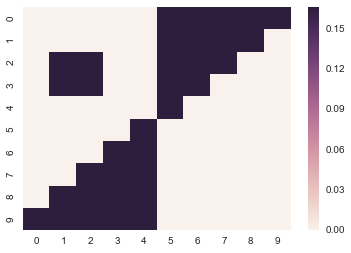

In [510]:
sns.heatmap(Alpha[::-1])

In [542]:
# Params
learning_rate = 1e1
training_epochs = 1001
display_step = 200
d = cumul.dim

In [543]:
U, s, V = np.linalg.svd(cumul.C)
sqrt_C = sqrtm(cumul.C)
sqrt_L = np.sqrt(cumul.L)
#initial = tf.ones([d,d])
initial = tf.constant(np.dot(sqrt_C,np.diag(1./sqrt_L)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

In [ ]:
R = NPHC(cumul,initial,alpha=0.9,training_epochs=training_epochs,stochastic=False,weightGMM='eye',\
         display_step=display_step,learning_rate=learning_rate,optimizer='adam')

In [ ]:
initial = tf.constant(R,shape=[d,d])

In [ ]:
from scipy.linalg import inv
G = np.eye(R.shape[0]) - inv(R)
#G[G<.3*np.max(G)]=0
sns.heatmap(G[::-1])

In [22]:
list_R = []
l_r = learning_rate

#alpha_arr = np.append(np.logspace(0,-5,6),0)
alpha_arr = np.linspace(.8,0,5)

for i, alpha in enumerate(alpha_arr):
    print("alpha =", alpha)
    if i == 0: R_init = initial
    if i > 0: 
        l_r = learning_rate
        #training_epochs *= 2
    R = NPHC(cumul,R_init,alpha=alpha,training_epochs=training_epochs,stochastic=False,\
       learning_rate=l_r,display_step=display_step,optimizer='rmsprop')
    list_R.append(R)
    R_init = tf.constant(R,shape=[d,d])

alpha = 0.8
Epoch: 0000 log10(cost)= 4.594129086
Epoch: 0010 log10(cost)= 1.224424601
Epoch: 0020 log10(cost)= 1.630659461
Epoch: 0030 log10(cost)= 1.833336830
Epoch: 0040 log10(cost)= 1.444997430
Epoch: 0050 log10(cost)= 1.527598143
Optimization Finished!
alpha = 0.6
Epoch: 0000 log10(cost)= 6.229182720
Epoch: 0010 log10(cost)= 2.784525394
Epoch: 0020 log10(cost)= 2.855283260
Epoch: 0030 log10(cost)= 2.988052607
Epoch: 0040 log10(cost)= 3.651978493
Epoch: 0050 log10(cost)= 2.700597763
Optimization Finished!
alpha = 0.4
Epoch: 0000 log10(cost)= 6.715731621
Epoch: 0010 log10(cost)= 3.029417753
Epoch: 0020 log10(cost)= 3.128521442
Epoch: 0030 log10(cost)= 4.571447372
Epoch: 0040 log10(cost)= 2.827028036
Epoch: 0050 log10(cost)= 4.123177052
Optimization Finished!
alpha = 0.2
Epoch: 0000 log10(cost)= 4.730893135
Epoch: 0010 log10(cost)= 2.698323011
Epoch: 0020 log10(cost)= 2.668202400
Epoch: 0030 log10(cost)= 2.573683262
Epoch: 0040 log10(cost)= 2.891274214
Epoch: 0050 log10(cost)= 2.37110

KeyboardInterrupt: 

In [ ]:
#alpha = 0.01
#R_init = initial
#R = NPHC(cumul,R_init,alpha=alpha,training_epochs=training_epochs,\
#     learning_rate=learning_rate,display_step=display_step,optimizer='adam')

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


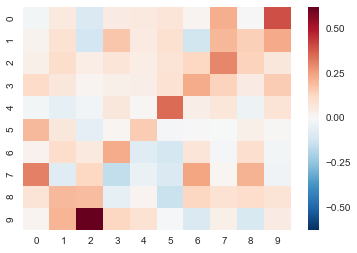

In [25]:
from scipy.linalg import inv
#R = list_R[0]
G = np.eye(R.shape[0]) - inv(R)
#G[G<0]=0
sns.heatmap(G[::-1])